# Farhad Hamidi
## Email: mrfarhadhamidi@gmail.com

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
list_dirname = []
for dirname, _, filenames in os.walk('/kaggle/input/bearing-dataset/3rd_test/4th_test/txt/'):
    for filename in filenames:
        list_dirname.append(os.path.join(dirname, filename))

In [2]:
print(len(list_dirname))
print(list_dirname[1000])
print(list_dirname[2000])
print(list_dirname[3000])
print(list_dirname[4000])

6324
/kaggle/input/bearing-dataset/3rd_test/4th_test/txt/2004.03.21.16.21.57
/kaggle/input/bearing-dataset/3rd_test/4th_test/txt/2004.03.31.13.51.57
/kaggle/input/bearing-dataset/3rd_test/4th_test/txt/2004.04.07.19.51.57
/kaggle/input/bearing-dataset/3rd_test/4th_test/txt/2004.03.10.09.42.46


In [3]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [4]:
dataset_1000=pd.read_csv(list_dirname[1000],sep='\t',header=None)
dataset_2000=pd.read_csv(list_dirname[2000],sep='\t',header=None)
dataset_3000=pd.read_csv(list_dirname[3000],sep='\t',header=None)
dataset_4000=pd.read_csv(list_dirname[4000],sep='\t',header=None)
dataset_1000

,0,1,2,3
0,-0.103,-0.066,0.015,-0.063
1,-0.088,-0.122,0.081,0.010
2,0.049,-0.032,0.029,0.012
3,0.000,-0.022,0.059,-0.005
4,-0.022,-0.085,0.029,-0.027
...,...,...,...,...
20475,0.037,0.054,-0.054,-0.010
20476,-0.063,0.056,0.081,-0.146
20477,0.020,0.103,-0.024,-0.112
20478,0.110,0.068,0.027,-0.078


**For Signal Number 1000**

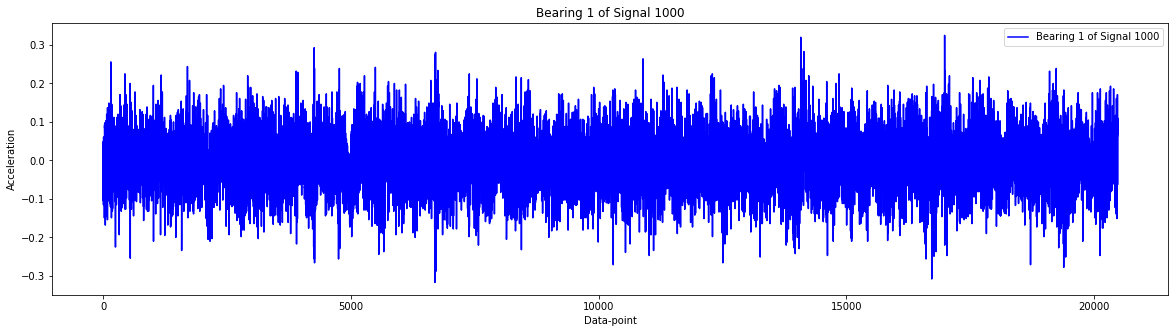

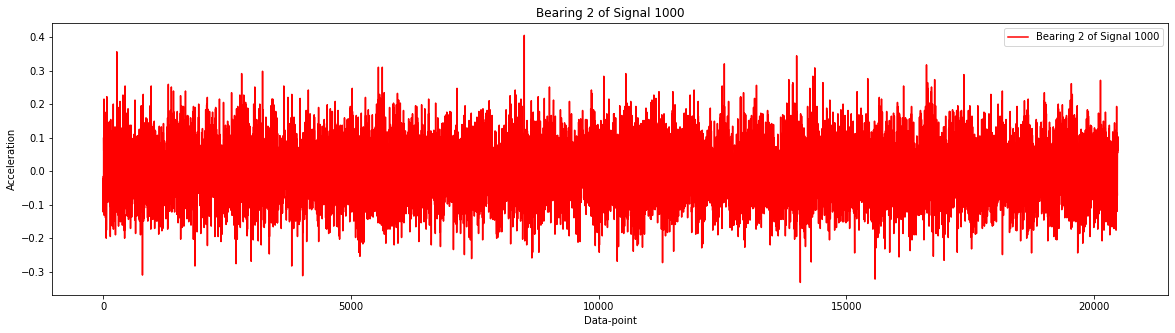

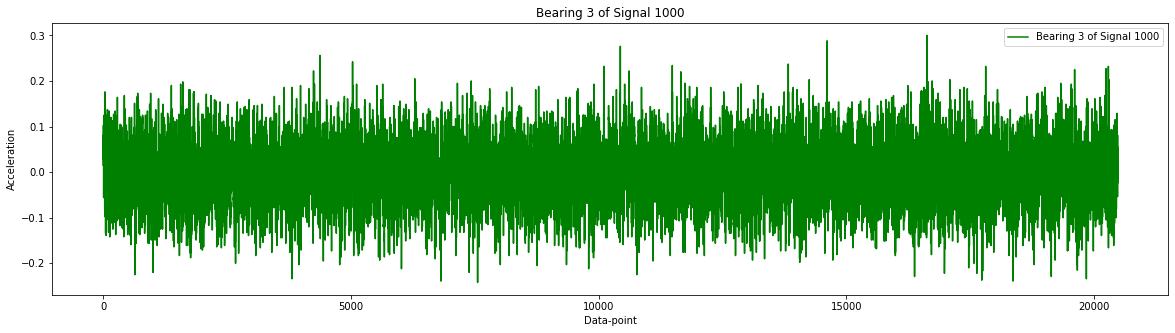

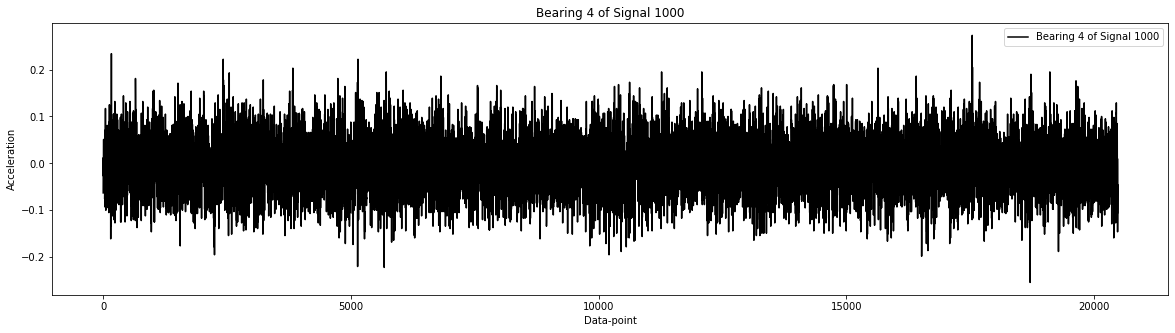

In [5]:
for i in [0,1,2,3]:
    
    df_bearing_1000=np.array(dataset_1000.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    if i==0:
        plt.plot(df_bearing_1000,color='blue')
    elif i==1:
        plt.plot(df_bearing_1000,color='red')
    elif i==2:
        plt.plot(df_bearing_1000,color='green')
    else:
        plt.plot(df_bearing_1000,color='black')

    plt.legend(['Bearing {} of Signal 1000'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {} of Signal 1000'.format(i+1))
    plt.show()

**For Signal Number 2000**

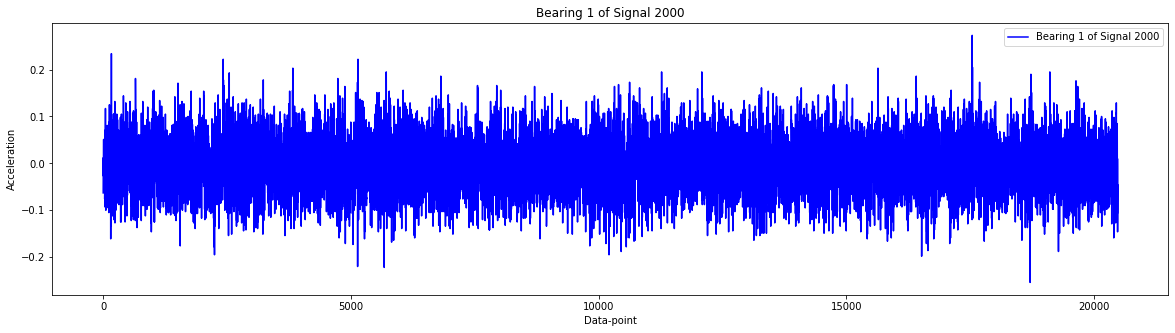

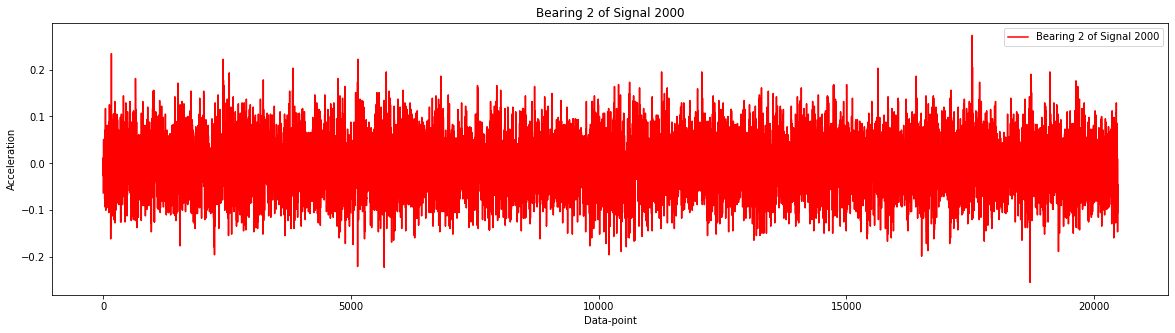

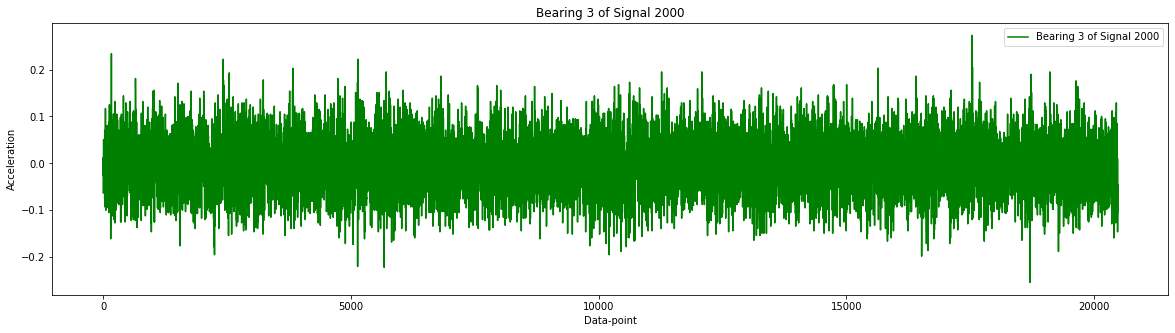

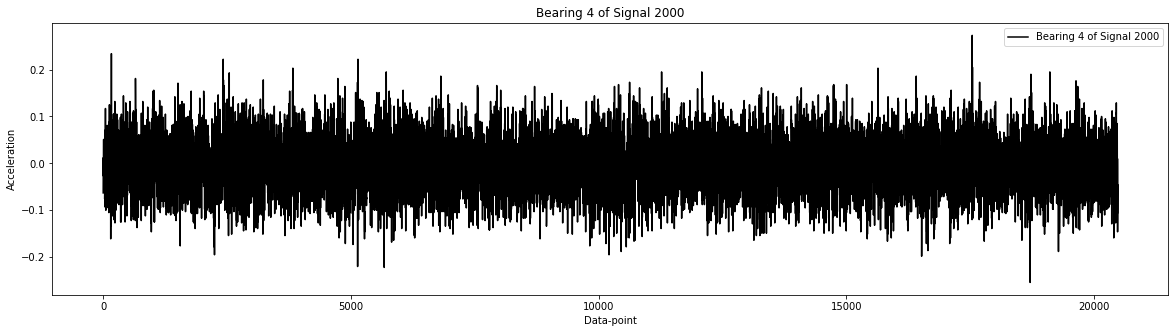

In [6]:
for i in [0,1,2,3]:
    
    df_bearing_2000=np.array(dataset_2000.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    if i==0:
        plt.plot(df_bearing_1000,color='blue')
    elif i==1:
        plt.plot(df_bearing_1000,color='red')
    elif i==2:
        plt.plot(df_bearing_1000,color='green')
    else:
        plt.plot(df_bearing_1000,color='black')

    plt.legend(['Bearing {} of Signal 2000'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {} of Signal 2000'.format(i+1))
    plt.show()

**For Signal Number 3000**

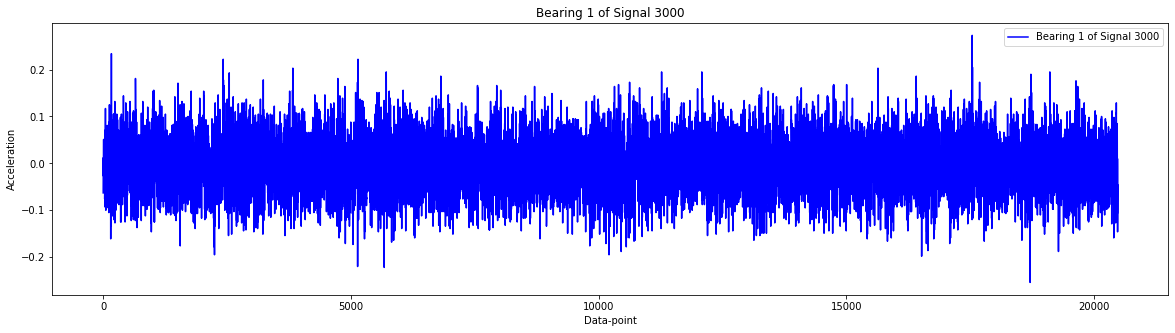

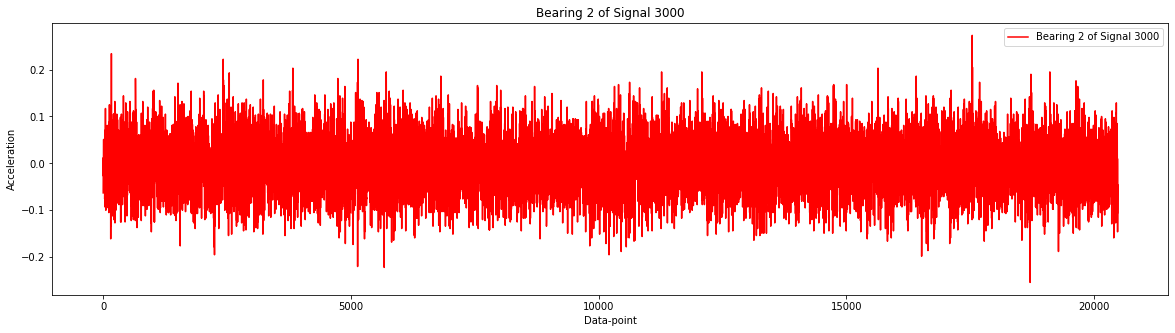

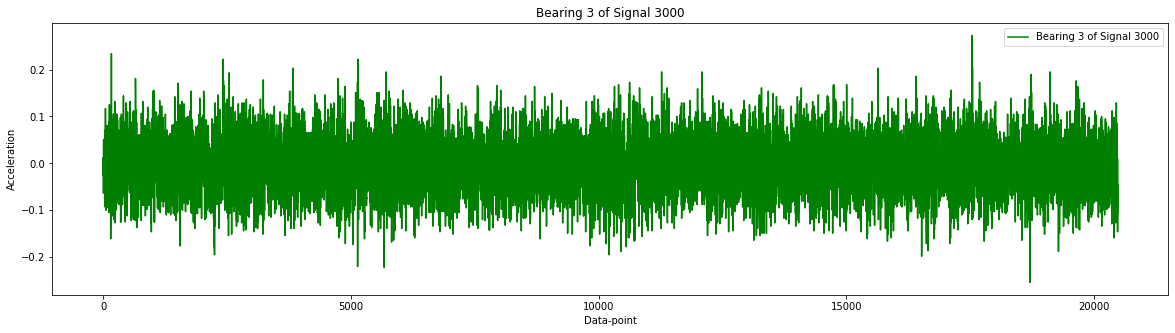

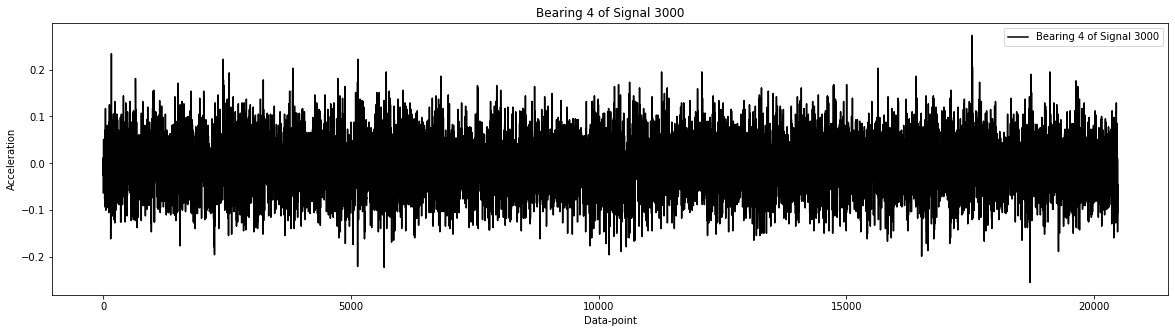

In [7]:
for i in [0,1,2,3]:
    
    df_bearing_3000=np.array(dataset_3000.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    if i==0:
        plt.plot(df_bearing_1000,color='blue')
    elif i==1:
        plt.plot(df_bearing_1000,color='red')
    elif i==2:
        plt.plot(df_bearing_1000,color='green')
    else:
        plt.plot(df_bearing_1000,color='black')

    plt.legend(['Bearing {} of Signal 3000'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {} of Signal 3000'.format(i+1))
    plt.show()

**For Signal Number 4000**

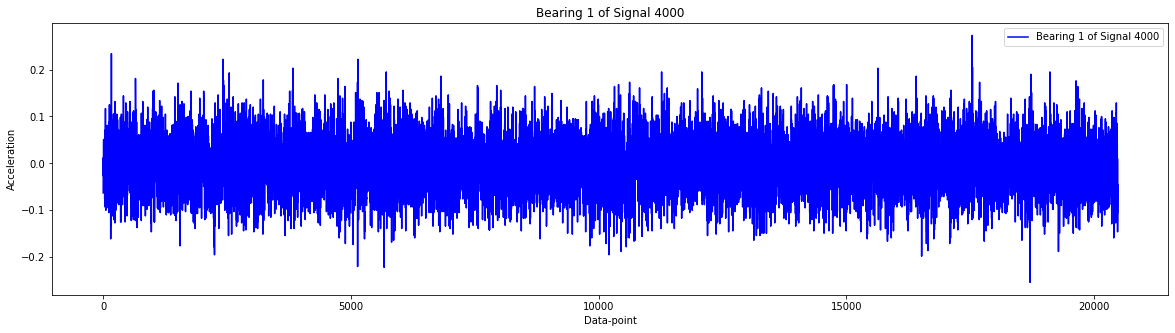

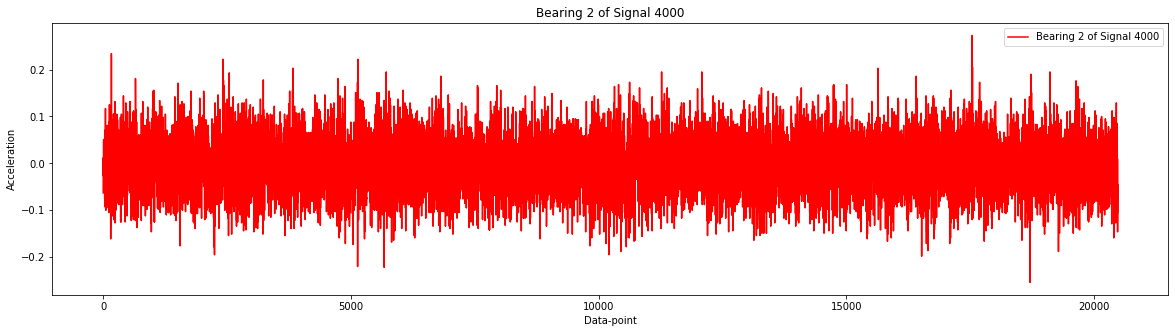

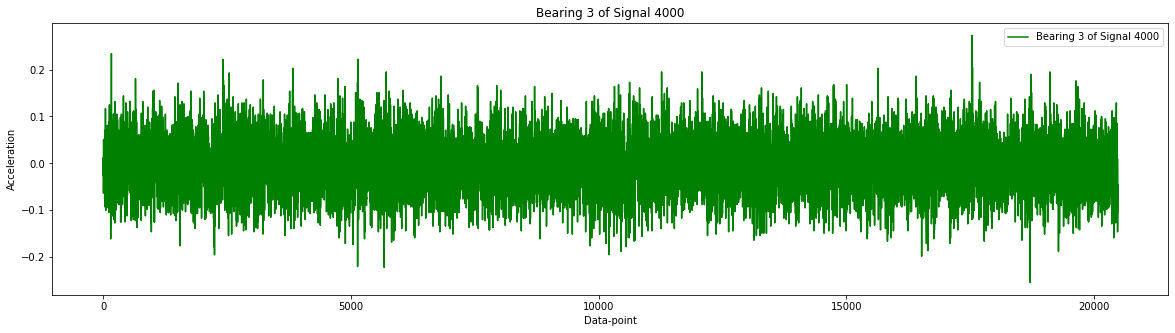

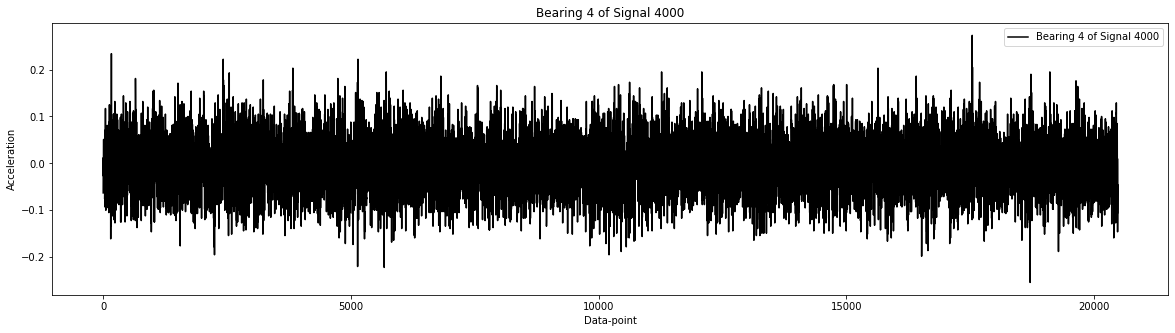

In [8]:
for i in [0,1,2,3]:
    
    df_bearing_4000=np.array(dataset_4000.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    if i==0:
        plt.plot(df_bearing_1000,color='blue')
    elif i==1:
        plt.plot(df_bearing_1000,color='red')
    elif i==2:
        plt.plot(df_bearing_1000,color='green')
    else:
        plt.plot(df_bearing_1000,color='black')

    plt.legend(['Bearing {} of Signal 4000'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {} of Signal 4000'.format(i+1))
    plt.show()

### We will calculate following time domain features:

1. Root mean square value (RMS)
2. Maximum value
3. Peak to Peak
4. Mean value
5. Variance(Var)
6. Standard deviation
7. Skewness
8. Kurtosis
9. Crest factor 

In [9]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [10]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [11]:
# extract peak-to-peak features
def calculate_p2p(x):
    return np.array(np.abs(x.max()) + np.abs(x.min()))

In [12]:
Time_feature_matrix_bearing_1=pd.DataFrame()
Time_feature_matrix_bearing_2=pd.DataFrame()
Time_feature_matrix_bearing_3=pd.DataFrame()
Time_feature_matrix_bearing_4=pd.DataFrame()

test_set=3


path=r'../input/bearing-dataset/3rd_test/4th_test/txt/'
for bearing_no in [1,2,3,4]:
    for filename in os.listdir(path):
    
        dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

        bearing_data = np.array(dataset.iloc[:,bearing_no-1])

        feature_matrix=np.zeros((1,9))
        temp = bearing_data
        feature_matrix[0,0] = np.sqrt(np.mean(temp ** 2))
        feature_matrix[0,1] = np.max(temp)
        feature_matrix[0,2] = calculate_p2p(temp)
        feature_matrix[0,3] = np.mean(temp)
        feature_matrix[0,4] = np.var(temp)
        feature_matrix[0,5] = np.std(temp)
        feature_matrix[0,6] = compute_skewness(temp)
        feature_matrix[0,7] = compute_kurtosis(temp)
        feature_matrix[0,8] = feature_matrix[0,1]/feature_matrix[0,0]

        if bearing_no == 1:
            df1 = pd.DataFrame(feature_matrix)
            df1.index=[filename[:-3]]
            Time_feature_matrix_bearing_1 = Time_feature_matrix_bearing_1.append(df1)
        elif bearing_no == 2:
            df2 = pd.DataFrame(feature_matrix)
            df2.index=[filename[:-3]]
            Time_feature_matrix_bearing_2 = Time_feature_matrix_bearing_2.append(df2)
        elif bearing_no == 3:
            df3 = pd.DataFrame(feature_matrix)
            df3.index=[filename[:-3]]
            Time_feature_matrix_bearing_3 = Time_feature_matrix_bearing_3.append(df3)
        else:
            df4 = pd.DataFrame(feature_matrix)
            df4.index=[filename[:-3]]
            Time_feature_matrix_bearing_4 = Time_feature_matrix_bearing_4.append(df4)

# Bearing 1 Features

In [13]:
Time_feature_matrix_bearing_1.columns = ['RMS','Max','Peak to Peak','Mean','Variance','STD','Skewness','Kurtosis','Crest Factor']
Time_feature_matrix_bearing_1.index = pd.to_datetime(Time_feature_matrix_bearing_1.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix_bearing_1 = Time_feature_matrix_bearing_1.sort_index()

Time_feature_matrix_bearing_1.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(1,test_set))

Time_feature_matrix_bearing_1

,RMS,Max,Peak to Peak,Mean,Variance,STD,Skewness,Kurtosis,Crest Factor
2004-03-04 09:27:00,0.079768,0.547,1.116,-0.004715,0.006341,0.079629,0.030875,1.292301,6.857363
2004-03-04 09:32:00,0.078678,0.491,0.952,-0.005102,0.006164,0.078512,-0.013806,1.156631,6.240622
2004-03-04 09:42:00,0.079815,0.515,0.969,-0.002242,0.006365,0.079784,0.033417,0.889743,6.452419
2004-03-04 09:52:00,0.081082,0.520,1.072,-0.002552,0.006568,0.081042,-0.027038,1.181453,6.413225
2004-03-04 10:02:00,0.079165,0.369,0.750,-0.002534,0.006261,0.079124,-0.017774,0.585448,4.661149
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.154785,0.742,1.409,-0.002483,0.023952,0.154765,0.161841,0.284098,4.793745
2004-04-18 02:12:00,0.137870,0.613,1.189,-0.001885,0.019005,0.137857,0.109001,0.035104,4.446217
2004-04-18 02:22:00,0.147181,0.754,1.442,-0.002402,0.021656,0.147161,0.291569,0.552675,5.122955
2004-04-18 02:32:00,0.154482,0.933,1.565,-0.003033,0.023855,0.154452,0.440079,1.093348,6.039545


# Bearing 2 Features

In [14]:
Time_feature_matrix_bearing_2.columns = ['RMS','Max','Peak to Peak','Mean','Variance','STD','Skewness','Kurtosis','Crest Factor']
Time_feature_matrix_bearing_2.index = pd.to_datetime(Time_feature_matrix_bearing_2.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix_bearing_2 = Time_feature_matrix_bearing_2.sort_index()

Time_feature_matrix_bearing_2.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(2,test_set))

Time_feature_matrix_bearing_2

,RMS,Max,Peak to Peak,Mean,Variance,STD,Skewness,Kurtosis,Crest Factor
2004-03-04 09:27:00,0.096720,0.527,0.964,-0.003905,0.009339,0.096641,0.152035,0.776082,5.448737
2004-03-04 09:32:00,0.092008,0.537,1.016,-0.005115,0.008439,0.091866,0.146235,0.701574,5.836461
2004-03-04 09:42:00,0.093430,0.496,1.092,-0.002249,0.008724,0.093403,0.171792,0.936283,5.308774
2004-03-04 09:52:00,0.092803,0.476,0.989,-0.001115,0.008611,0.092796,0.166062,0.379024,5.129135
2004-03-04 10:02:00,0.092829,0.518,1.080,-0.000780,0.008617,0.092826,0.145970,0.503687,5.580131
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.234436,0.872,1.758,-0.001246,0.054959,0.234432,0.076449,-0.102991,3.719571
2004-04-18 02:12:00,0.207229,0.891,1.709,-0.002077,0.042939,0.207218,-0.016977,-0.040071,4.299600
2004-04-18 02:22:00,0.250657,0.864,1.711,-0.002420,0.062823,0.250646,-0.029070,-0.230784,3.446939
2004-04-18 02:32:00,0.257200,0.962,2.254,-0.002095,0.066148,0.257192,-0.156068,0.658018,3.740276


# Bearing 3 Features

In [15]:
Time_feature_matrix_bearing_3.columns = ['RMS','Max','Peak to Peak','Mean','Variance','STD','Skewness','Kurtosis','Crest Factor']
Time_feature_matrix_bearing_3.index = pd.to_datetime(Time_feature_matrix_bearing_3.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix_bearing_3 = Time_feature_matrix_bearing_3.sort_index()

Time_feature_matrix_bearing_3.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(3,test_set))

Time_feature_matrix_bearing_3

,RMS,Max,Peak to Peak,Mean,Variance,STD,Skewness,Kurtosis,Crest Factor
2004-03-04 09:27:00,0.066390,0.361,0.671,-0.005148,0.004381,0.066190,0.083449,0.591902,5.437565
2004-03-04 09:32:00,0.066285,0.295,0.590,-0.006310,0.004354,0.065984,0.011828,0.359751,4.450449
2004-03-04 09:42:00,0.069186,0.286,0.572,-0.001293,0.004785,0.069174,0.049056,0.213724,4.133782
2004-03-04 09:52:00,0.068637,0.349,0.659,-0.002280,0.004706,0.068599,0.002209,0.299035,5.084751
2004-03-04 10:02:00,0.067469,0.388,0.762,-0.001727,0.004549,0.067447,0.031884,0.395754,5.750781
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.495363,3.167,8.167,0.017613,0.245075,0.495050,-1.648364,16.742241,6.393285
2004-04-18 02:12:00,0.454466,2.378,6.277,-0.002114,0.206535,0.454461,-0.656841,5.707273,5.232514
2004-04-18 02:22:00,0.590047,4.346,9.346,-0.079840,0.341781,0.584620,-0.426006,12.660025,7.365514
2004-04-18 02:32:00,0.758765,4.998,9.998,0.052137,0.573006,0.756972,-0.220131,7.058920,6.587018


# Bearing 4 Features

In [16]:
Time_feature_matrix_bearing_4.columns = ['RMS','Max','Peak to Peak','Mean','Variance','STD','Skewness','Kurtosis','Crest Factor']
Time_feature_matrix_bearing_4.index = pd.to_datetime(Time_feature_matrix_bearing_4.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix_bearing_4 = Time_feature_matrix_bearing_4.sort_index()

Time_feature_matrix_bearing_4.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(4,test_set))

Time_feature_matrix_bearing_4

,RMS,Max,Peak to Peak,Mean,Variance,STD,Skewness,Kurtosis,Crest Factor
2004-03-04 09:27:00,0.055493,0.254,0.557,-0.004331,0.003061,0.055323,0.038845,0.559706,4.577189
2004-03-04 09:32:00,0.053351,0.212,0.461,-0.006725,0.002801,0.052925,0.013904,0.355708,3.973709
2004-03-04 09:42:00,0.052703,0.278,0.556,-0.003200,0.002767,0.052606,0.034235,0.477955,5.274828
2004-03-04 09:52:00,0.054844,0.269,0.569,-0.004379,0.002989,0.054669,0.007403,0.341732,4.904798
2004-03-04 10:02:00,0.053914,0.227,0.474,-0.003443,0.002895,0.053804,0.023473,0.261460,4.210398
...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.248081,0.867,1.822,-0.003682,0.061531,0.248053,-0.026558,0.022271,3.494830
2004-04-18 02:12:00,0.253654,0.918,1.731,-0.003608,0.064328,0.253629,0.104431,-0.257887,3.619096
2004-04-18 02:22:00,0.279863,1.082,2.186,-0.003425,0.078312,0.279842,0.002889,0.030199,3.866172
2004-04-18 02:32:00,0.282174,0.881,1.850,-0.003452,0.079610,0.282153,-0.108601,-0.486148,3.122183


# Plot Time Features of bearing number 1 to 4:

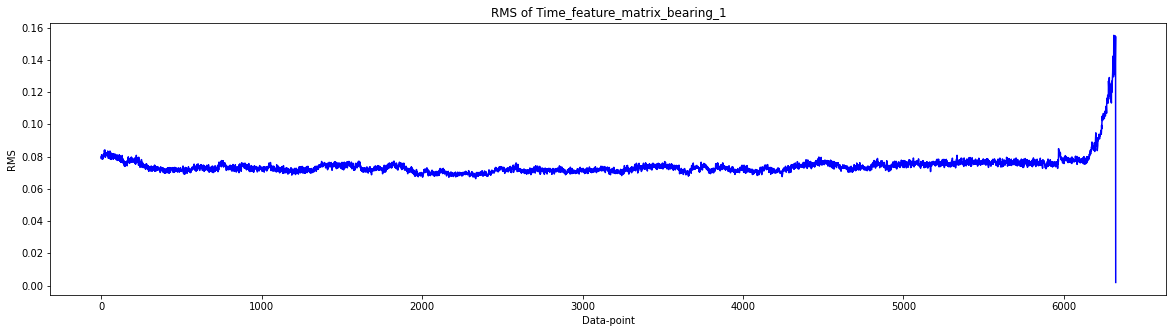

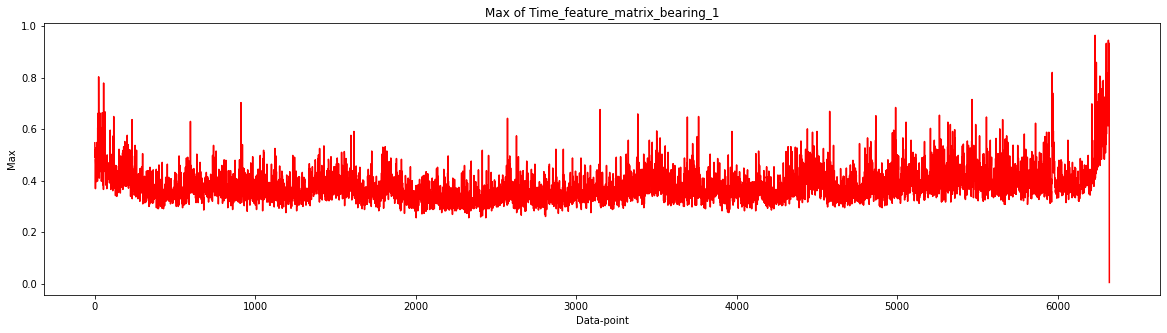

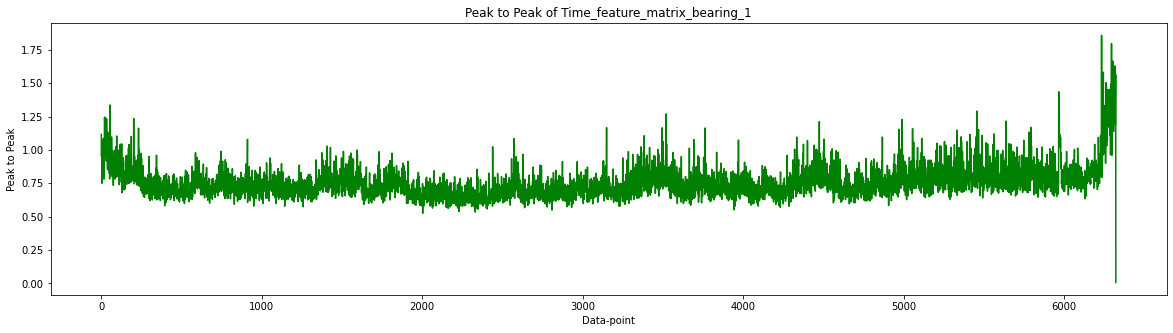

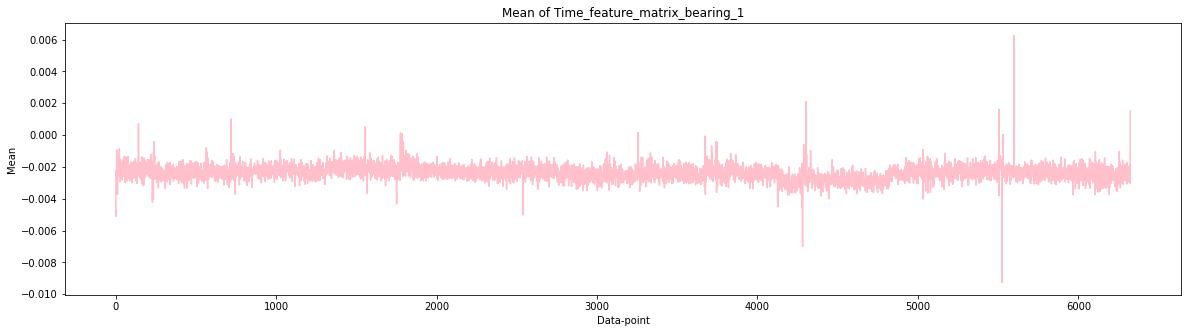

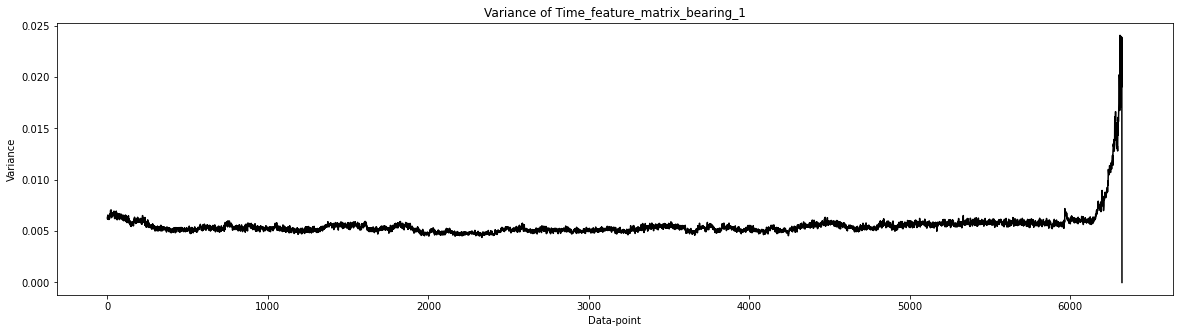

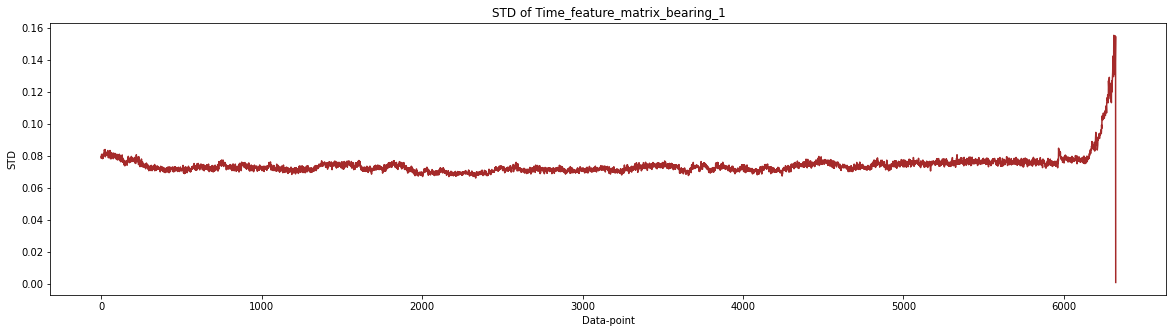

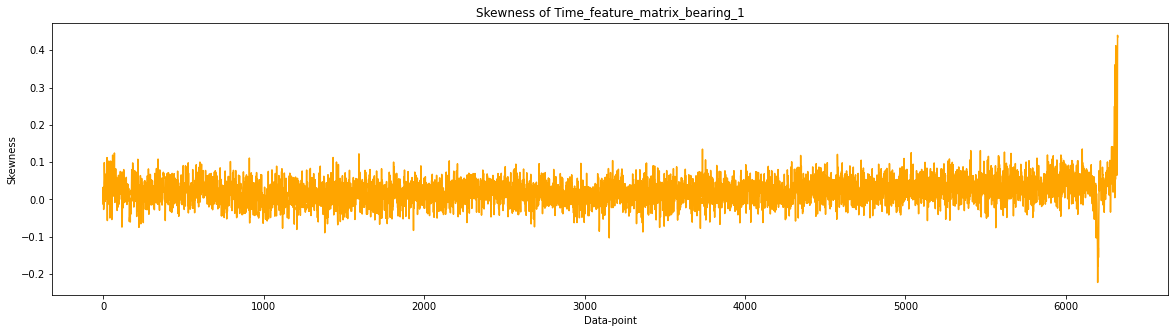

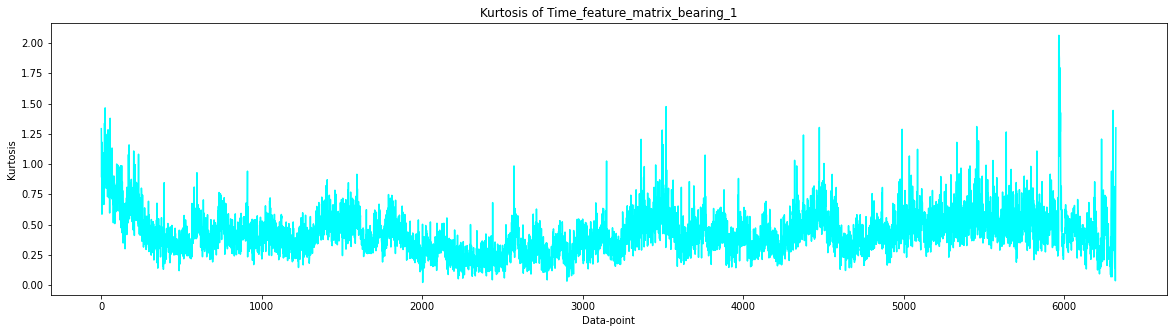

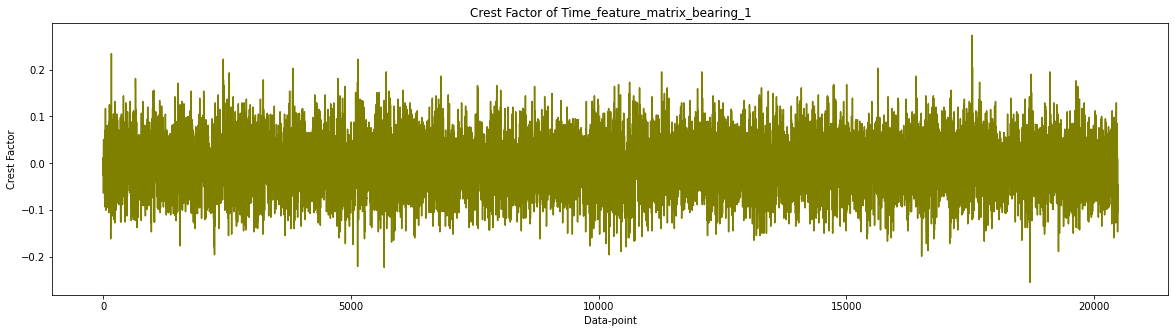

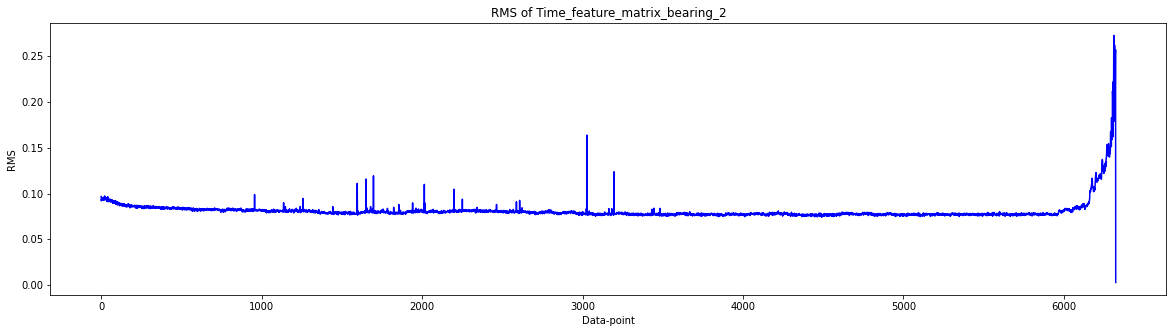

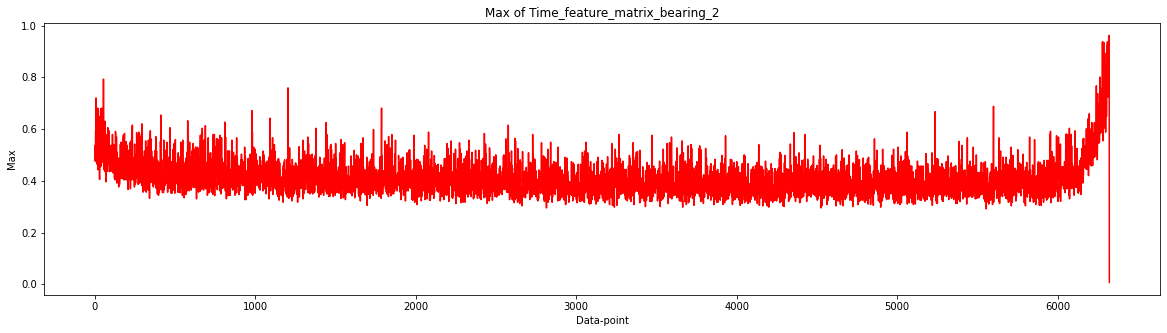

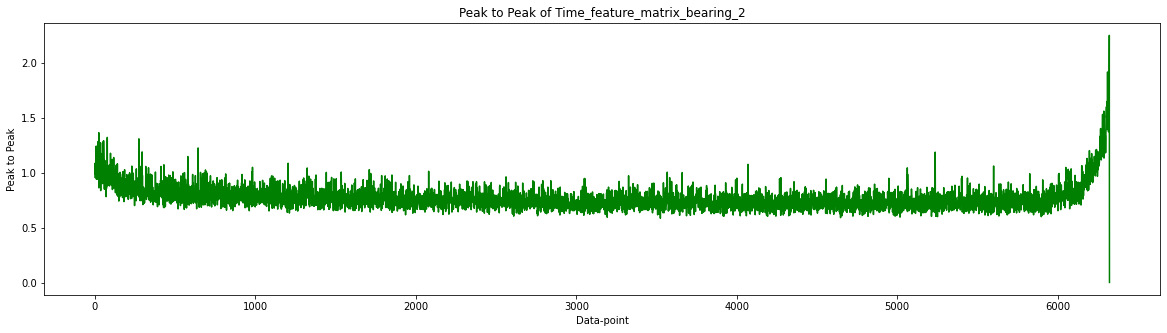

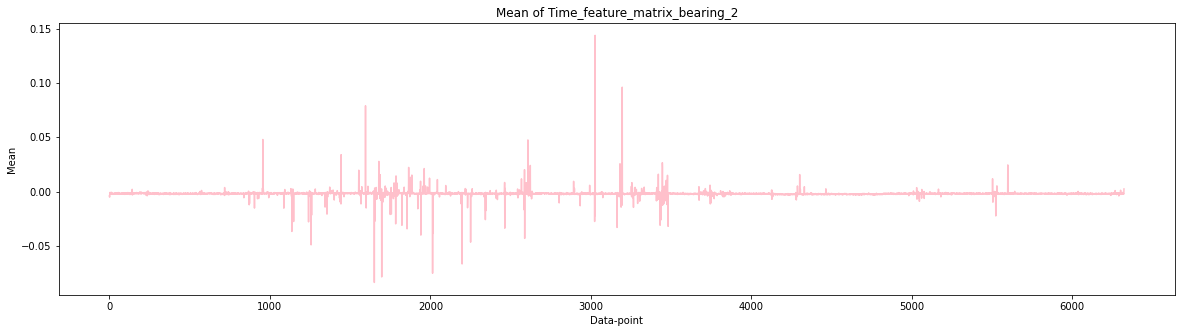

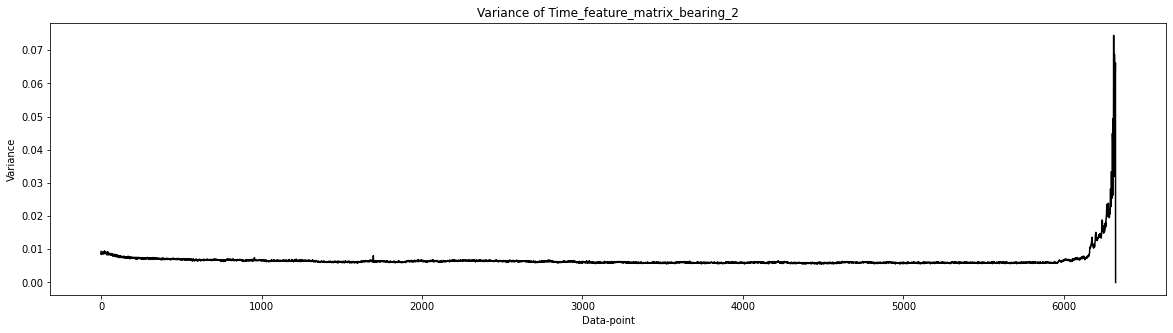

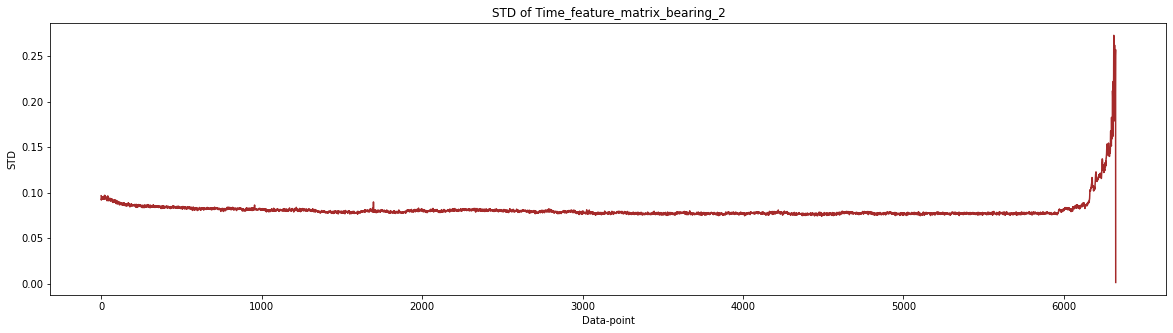

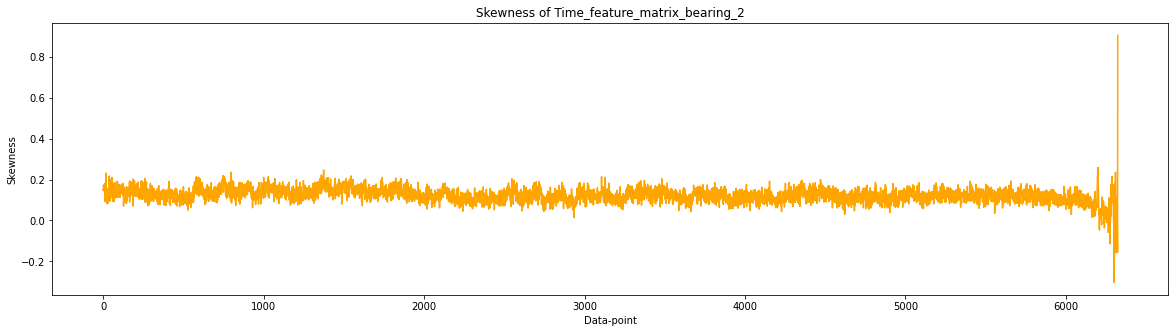

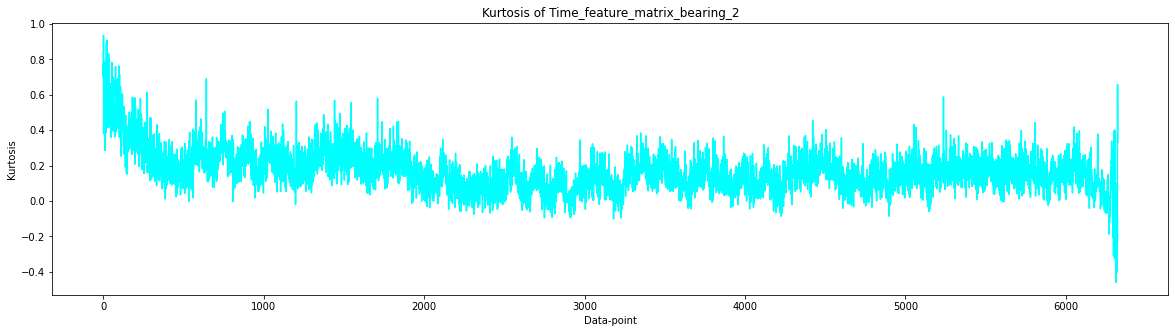

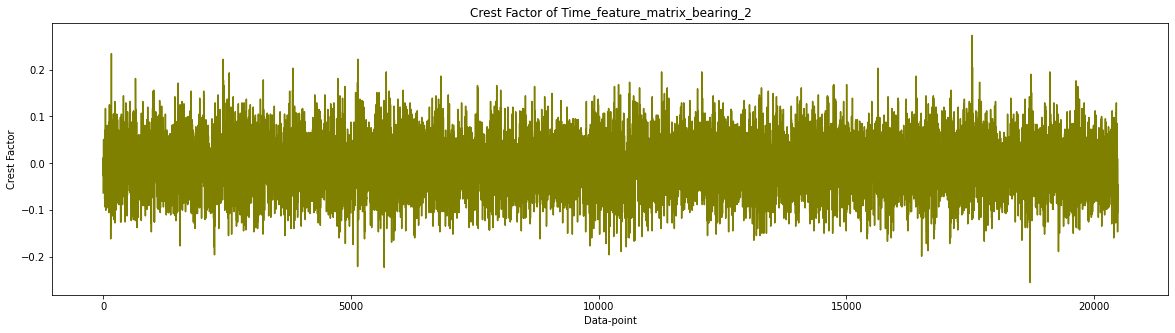

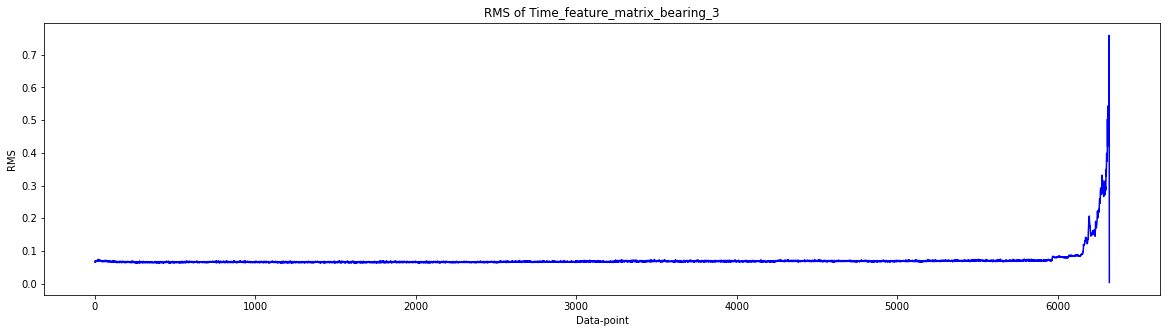

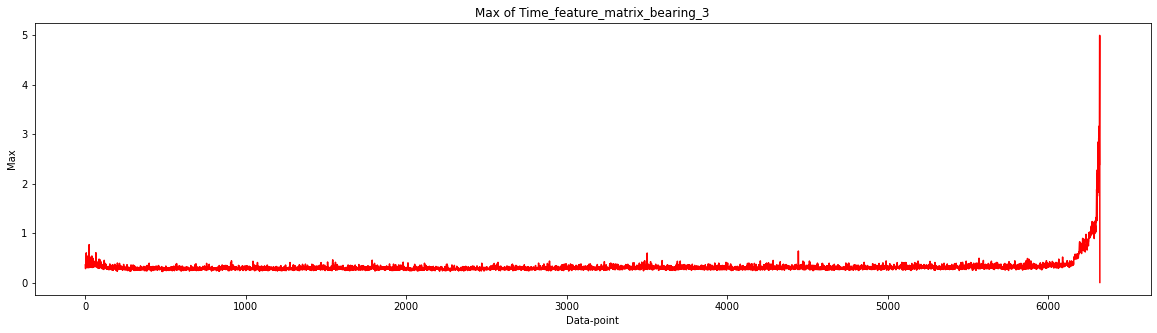

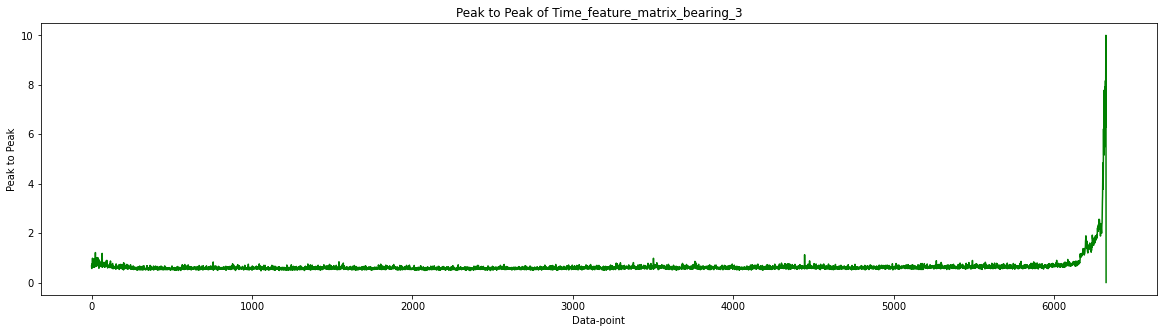

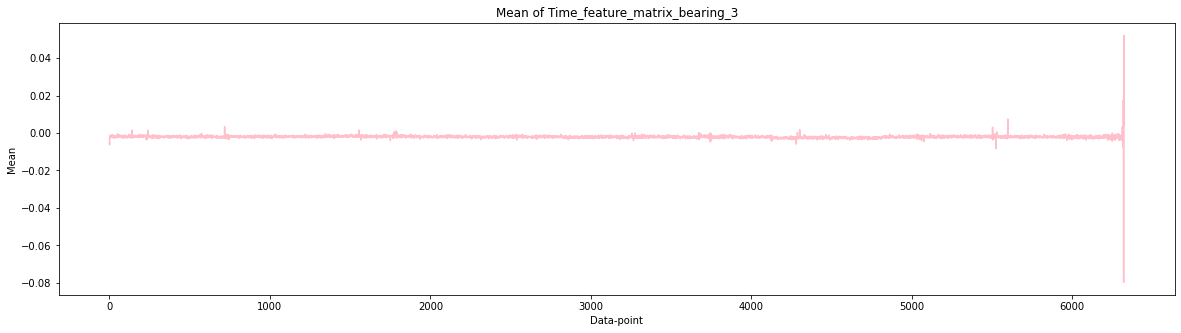

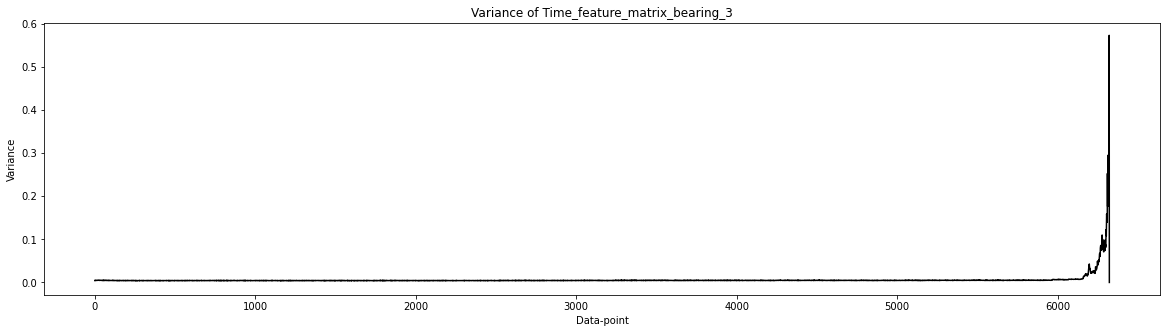

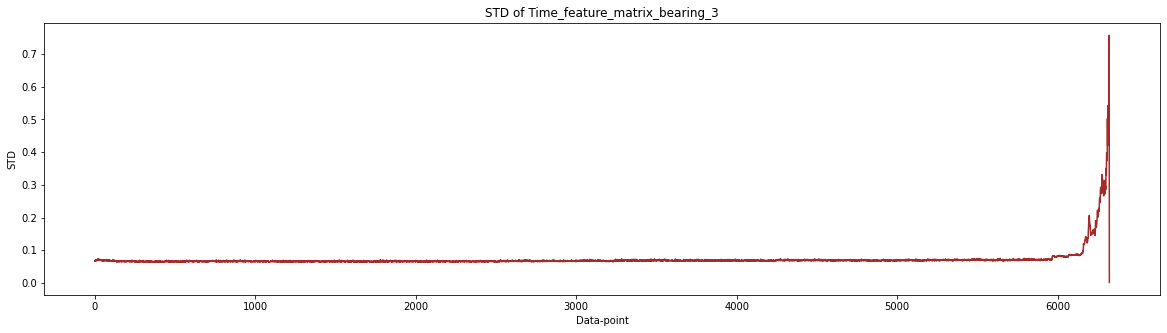

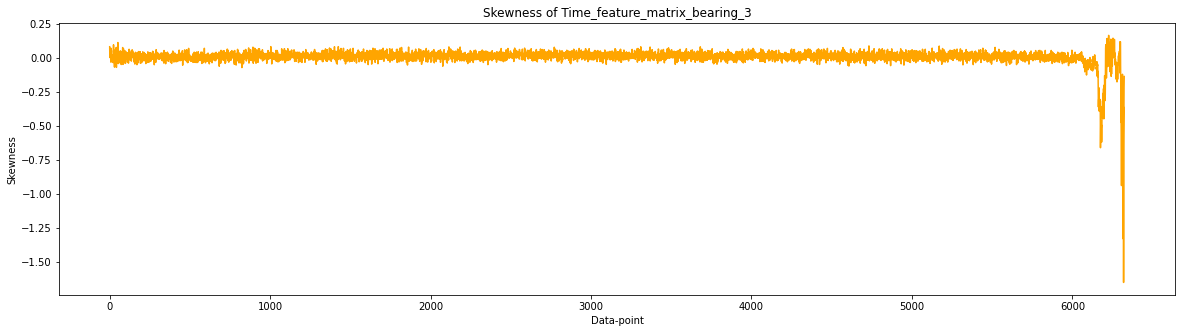

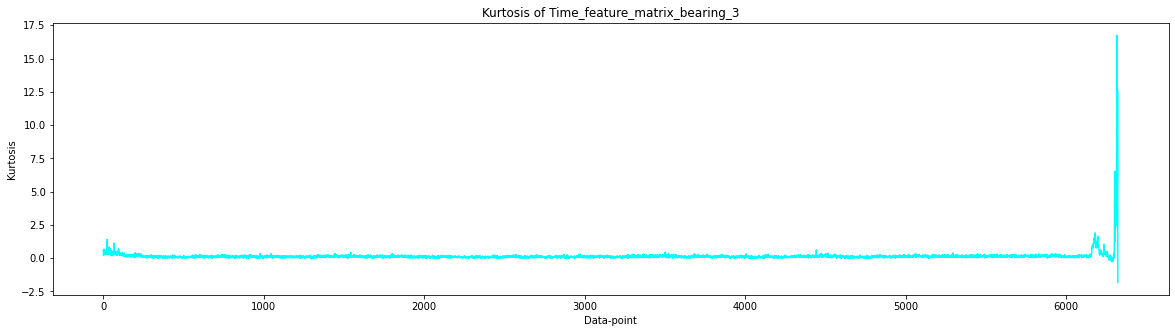

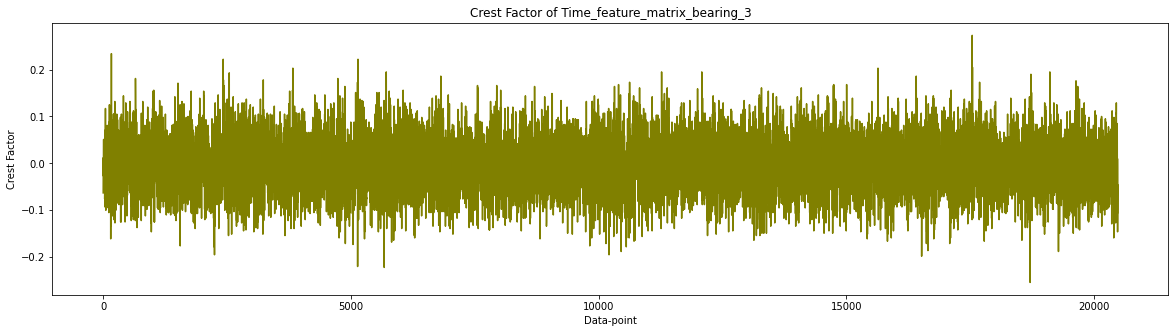

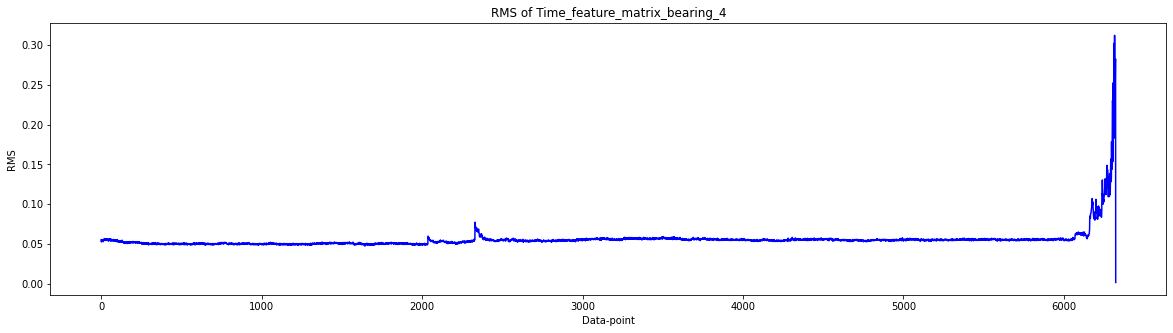

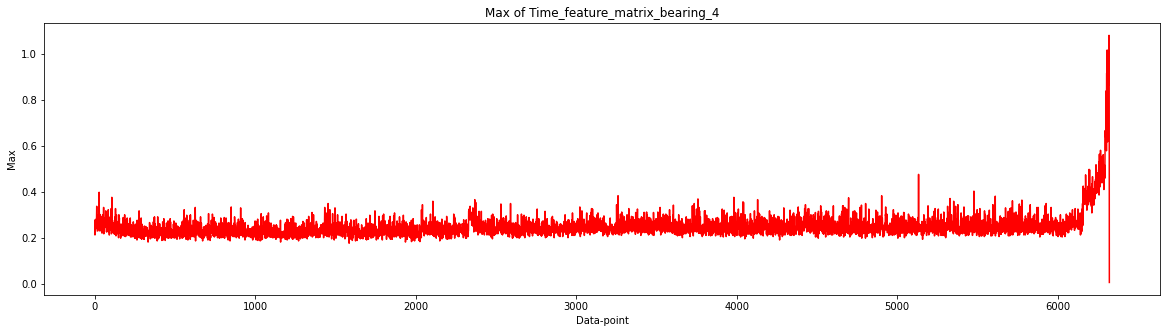

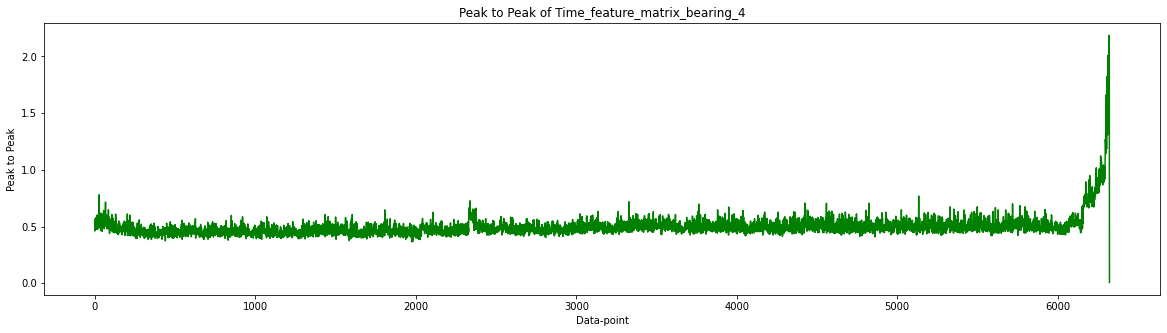

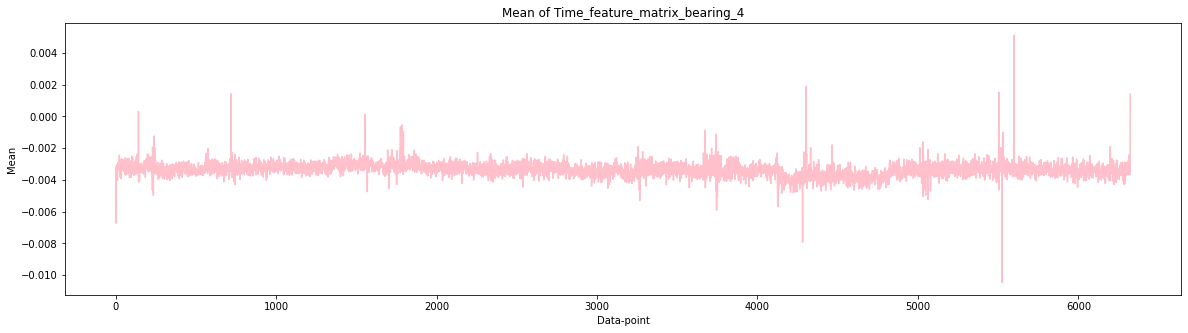

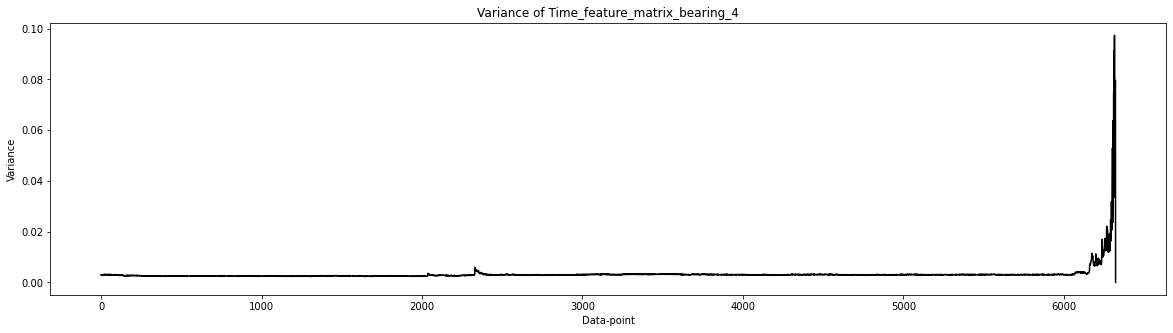

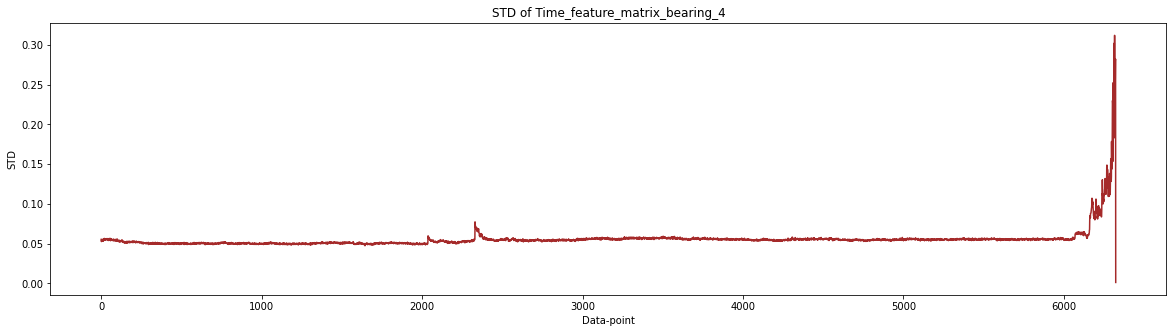

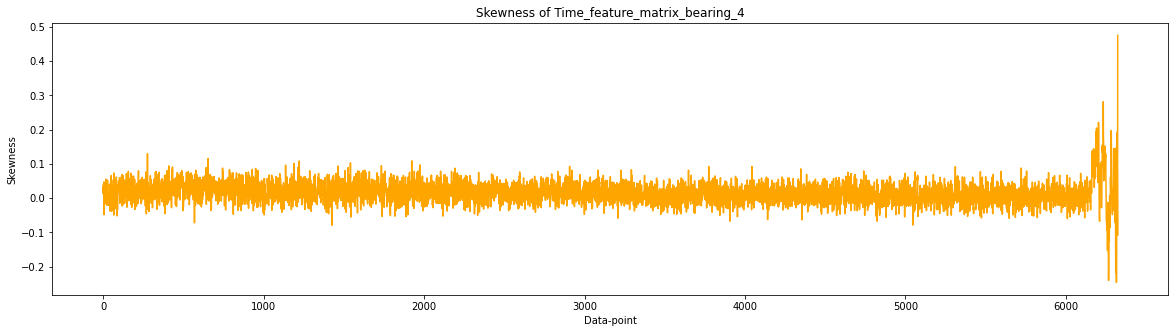

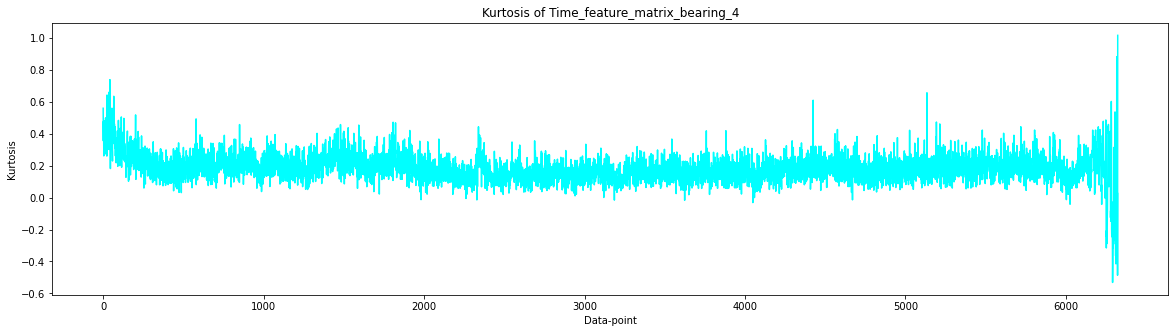

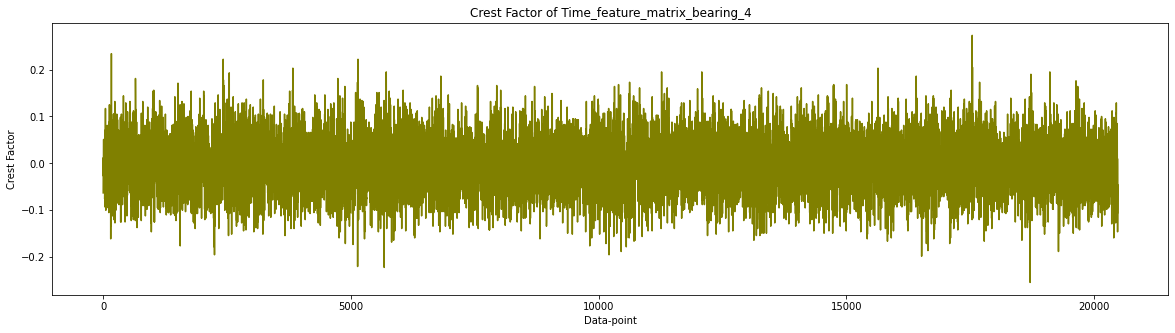

In [18]:
for bearing_no in ['Time_feature_matrix_bearing_1','Time_feature_matrix_bearing_2',
                   'Time_feature_matrix_bearing_3','Time_feature_matrix_bearing_4']:
    for i in [0,1,2,3,4,5,6,7,8]:
    
        df_bearing=np.array(globals()[bearing_no].iloc[:,i])
    
        plt.figure(figsize=(20, 5))
        if i==0:
            plt.plot(df_bearing,color='blue')
        elif i==1:
            plt.plot(df_bearing,color='red')
        elif i==2:
            plt.plot(df_bearing,color='green')
        elif i==3:
            plt.plot(df_bearing,color='pink')
        elif i==4:
            plt.plot(df_bearing,color='black')
        elif i==5:
            plt.plot(df_bearing,color='brown')
        elif i==6:
            plt.plot(df_bearing,color='orange')
        elif i==7:
            plt.plot(df_bearing,color='cyan')   
        else:
            plt.plot(df_bearing_1000,color='olive')
        plt.xlabel("Data-point")
        plt.ylabel("{}".format(globals()[bearing_no].columns[i]))
        plt.title('{} of {}'.format(globals()[bearing_no].columns[i],bearing_no))
        plt.show()